In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import carga_datos as cd
import importlib
importlib.reload(cd)



<module 'carga_datos' from 'c:\\Users\\ekkol\\OneDrive\\Escritorio\\RepositorioVario\\lab_intermedio\\modulos\\carga_datos.py'>

Carga de Datos

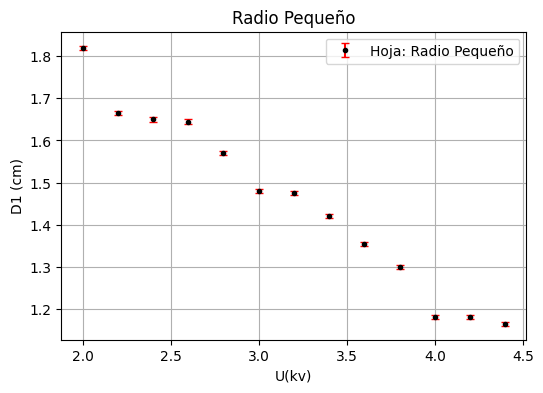

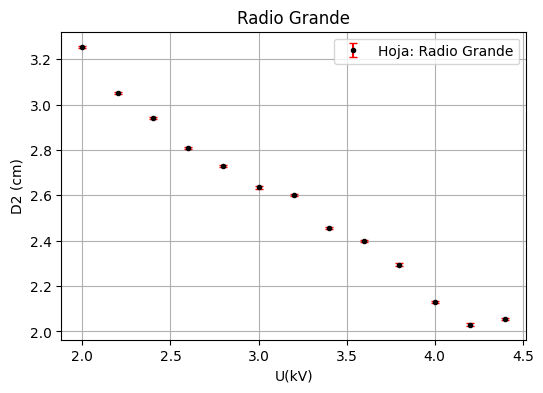

In [138]:
Data= cd.plot_excel_sheets(r"C:/Users/ekkol/OneDrive/Escritorio/RepositorioVario/lab_intermedio/difraccion_electrones/datos_difraccion_electrones.xlsx", False)
radio_pequeño = Data["Radio Pequeño"]
radio_grande = Data["Radio Grande"]
#print(Data)


calculamos $\lambda_{\text{broglie}} = \frac{h}{\sqrt{2 e V m_e}}$


In [ ]:
V_radio_pequeño = radio_pequeño["y"] * 1000 #Pasamos de kV a V
V_radio_grande = radio_grande["y"] * 1000 #Pasamos de kV a V
h = 6.62607015e-34 #Joules*segundos
m_e = 9.10938356e-31 #kg
e = 1.602176634e-19 #Coulombs10

def longitud_de_onda (V_v):
    l_broglie = (h / (np.sqrt(2 * m_e * e * V_v)))
    return l_broglie

def incer_lambda_broglie (V_v):
    incer_V = 0.1
    return h / (2*np.sqrt(2 * m_e * e * V_v**3)) * incer_V

#Devuelve arrays!
#print("l bragg = ",longitud_de_onda(V_radio_pequeño),"+-",incer_lambda_broglie(V_radio_pequeño))
#print("l bragg = ",longitud_de_onda(V_radio_grande),"+-",incer_lambda_broglie(V_radio_grande))

l bragg =  [2.87478683e-11 3.00471885e-11 3.01925204e-11 3.02383709e-11
 3.09521994e-11 3.18794252e-11 3.19334124e-11 3.25459661e-11
 3.33174452e-11 3.40149365e-11 3.57026405e-11 3.57026405e-11
 3.59317507e-11] +- [7.89776601e-16 9.01776366e-16 9.14924860e-16 9.19099418e-16
 9.85738833e-16 1.07700761e-15 1.08248856e-15 1.14598472e-15
 1.22942602e-15 1.30826679e-15 1.51282375e-15 1.51282375e-15
 1.54213522e-15]
l bragg$ =  [2.14964054e-11 2.22070781e-11 2.26187018e-11 2.31359949e-11
 2.34725362e-11 2.38919188e-11 2.40521922e-11 2.47523018e-11
 2.50343154e-11 2.56005912e-11 2.65736701e-11 2.72203259e-11
 2.70542455e-11] +- [3.30205920e-16 3.64050461e-16 3.84671799e-16 4.11672508e-16
 4.29899930e-16 4.53357093e-16 4.62542158e-16 5.04120200e-16
 5.21548237e-16 5.57747086e-16 6.23795072e-16 6.70451378e-16
 6.58254149e-16]


calculamos $\lambda_{\text{bragg}} = \frac{2d}{n} \sin \left[ \frac{1}{2} \tan^{-1} \left( \frac{D}{2L} \right) \right]$

In [141]:
d_1 = radio_pequeño["y"] #distancia en cm
d_2 = radio_grande["y"] #distancia en cm

#Distancias interplanares:

D1 = 213 #pm
D2 = 123 #pm

D1_m = D1 * 1e-12 #distancia en m
D2_m = D2 * 1e-12 #distancia en m

d_1_m = d_1 * 1e-2 #distancia en m
d_2_m = d_2 * 1e-2 #distancia en m

def longitud_de_onda_bragg_(d_m, D_m):
    return 2 * D_m * np.sin(0.5 * np.arctan(d_m/ (2 * 0.135)))

def incer_lambda_bragg (d_m, D_m):
    incer_d = 0.01
    return ((2 * D_m * np.cos(0.5 * np.arctan(d_m / (2 * 0.135))) * 1/(2*(1+(1/2*0.135)**2*d_m**2 * 2*0.135))) * incer_d)

print(longitud_de_onda_bragg_(0.0629, D2_m))
print(incer_lambda_bragg(d_2_m, D2_m))

2.8090911213089254e-11
[1.22778593e-12 1.22805369e-12 1.22819044e-12 1.22834577e-12
 1.22843798e-12 1.22854410e-12 1.22858228e-12 1.22873514e-12
 1.22879087e-12 1.22889385e-12 1.22904653e-12 1.22913362e-12
 1.22911223e-12]


Análisis de las cantidades (Ultima parte)

In [142]:
# Se conoce h

def distancia_interplanar (m):
    return (0.135*h) / (m*np.sqrt(2*m_e*e))

distancia_interplanar(3.48)

np.float64(4.757686974634083e-11)

In [143]:
# Se conocen d_i

def hallar_h (m,d):
    return (m*d*np.sqrt(2*m_e*e)) / (2*0.135)

def incer_hallar_h (m, d):
    incer_d = 0.01
    return np.sqrt((d*np.sqrt(2*m_e*e)/(2*0.135))**2 * incer_d**2)

a = hallar_h(2.29, 123.0e-12)
b = incer_hallar_h(2.29, 123.0e-12)

print(a, b)

5.636266487776576e-34 2.461251741387151e-36


Definimos la función de Ajuste y Extraemos los parámetros óptimos, la matriz de covarianza. Ajustamos nuestro diccionario de valores para que sea legible por nuestra plotting function

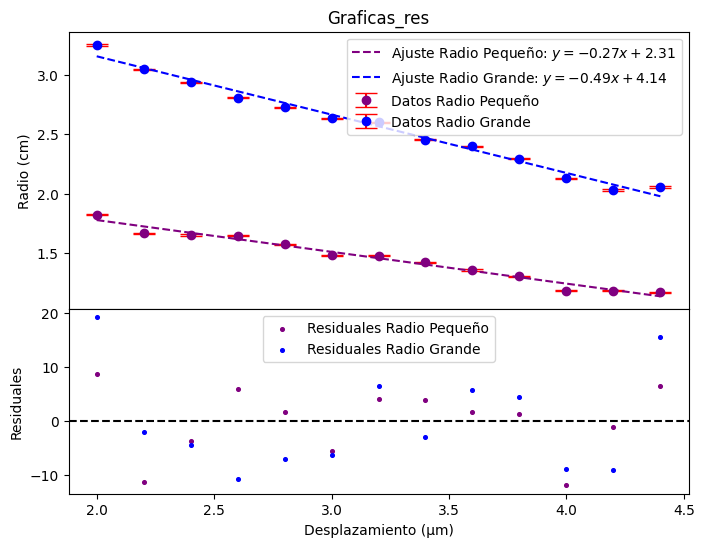

In [ ]:

def fitting_function(x, m, b):
    return m * x + b

popt_p, pcov_p = curve_fit(fitting_function, radio_pequeño["x"], radio_pequeño["y"], sigma=radio_pequeño["error"])
popt_g, pcov_g = curve_fit(fitting_function, radio_grande["x"], radio_grande["y"], sigma=radio_grande["error"])

formula_text_p = r"$y = {:.2f}x + {:.2f}$".format(popt_p[0], popt_p[1])
formula_text_g = r"$y = {:.2f}x + {:.2f}$".format(popt_g[0], popt_g[1])


radio_pequeño["popt"]=popt_p
radio_pequeño["formula_text"] = formula_text_p
radio_grande["popt"]=popt_g
radio_grande["formula_text"]=formula_text_g


cd.plot_fitted_curve(fitting_function, False, "Graficas_res" ,dataset1= radio_pequeño, dataset2 = radio_grande)